<a href="https://colab.research.google.com/github/rechavar/pyCovid_TechLabsProj/blob/Marco/TechLabs__finalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Now it's time for the predictions. The R-value I will use for that (the one that we want to be able to change with a slider) will unlike in the dataframe before not be one that is taken from a whole week but only from the past four days. The R_7 was used to reduce noise in the data, now we chose the R-value by ourselves, so there is no noise. First I will make a prediction for Germany for the next four weeks:

# TechLabs final project(problem 2 - group 8)

This Notebook is to work in the final project for Techlabs code-at-home course.
Members: Luca Wulfert, Laura Laks, Phillip Guske, Juliana Bedoya and Alejandro Echavarria

### libraries

In [0]:
import pandas as pd

### Constants

In [0]:
confirmed_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
death_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_csv_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

### Usefull databases

this is the DB that appear in kaggle.

In [0]:
data_confirmed = pd.read_csv(confirmed_csv_url)
data_death = pd.read_csv(death_csv_url)
data_recovered = pd.read_csv(recovered_csv_url)

### Code for all data cleaning

In [0]:
# Dropping all the innecesary columns
data_confirmed = data_confirmed.drop(['Province/State', 'Lat', 'Long'], axis = 1)
data_death = data_death.drop(['Province/State', 'Lat', 'Long'], axis = 1)
data_recovered = data_recovered.drop(['Province/State', 'Lat', 'Long'], axis = 1)

# Set New index
data_confirmed = data_confirmed.set_index('Country/Region')
data_death = data_death.set_index('Country/Region')
data_recovered = data_recovered.set_index('Country/Region')

# Groupping duplicated columns
data_confirmed = data_confirmed.groupby(by = data_confirmed.index, axis = 0).sum()
data_death = data_death.groupby(by= data_death.index, axis = 0 ).sum()
data_recovered = data_recovered.groupby(by= data_recovered.index, axis = 0).sum()

# add a total row
data_confirmed.loc['Global'] = data_confirmed.sum(axis=0)
data_death.loc['Global'] = data_death.sum(axis=0)
data_recovered.loc['Global'] = data_recovered.sum(axis=0)

In [5]:
data_confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Western Sahara,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130
Zambia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,39,40,40,43,45,45,48,48,52,57,61,65,70,74,76,84,84,88,88,95,97,106,109,119,124,137,138,146,153,167,252,267,267,441,446,654,654,679,753,761


Transposing the Dataframe so we now have Date as index and country as columns;
Changing the type of the index column to datetime:

In [6]:
data_confirmed=data_confirmed.T
data_confirmed.rename_axis(index='Date', columns="Country",inplace=True)
pd.to_datetime(data_confirmed.index)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-05-09', '2020-05-10', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
               '2020-05-17', '2020-05-18'],
              dtype='datetime64[ns]', name='Date', length=118, freq=None)

In [7]:
data_confirmed.head()

Country,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Congo (Brazzaville),...,Serbia,Seychelles,Sierra Leone,Singapore,Slovakia,Slovenia,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe,Global
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,555
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,654
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,941
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,...,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,7,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,0,0,0,1434
1/26/20,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,...,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,2118


In [8]:
data_confirmed.columns

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam', 'West Bank and Gaza',
       'Western Sahara', 'Yemen', 'Zambia', 'Zimbabwe', 'Global'],
      dtype='object', name='Country', length=189)

Test: Slicing the dataframe to only have the data for Germany:

In [9]:
germany_confirmed=data_confirmed.loc[:,["Germany"]]
germany_confirmed["Total Cases"]=germany_confirmed["Germany"]
germany_confirmed.drop("Germany",inplace=True, axis=1)
germany_confirmed.rename_axis(columns="Germany",inplace=True)
germany_confirmed

Germany,Total Cases
Date,
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
5/14/20,174478
5/15/20,175233
5/16/20,175752


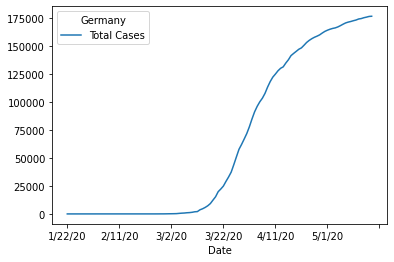

In [10]:
germany_confirmed.plot()

Calculating the R-value for any given day: I'm using the method the Robert-Koch-Institute uses - It is done by dividing the sum of new cases from the last seven days by the sum of new cases four days before that. 
I will be calling this value R_7
Four days is the generational interval, which is the time it takes on average for one infection to be transmitted to the next generation (because one isn't infectious right away). 
The seven days is used to smoothen the curve by reducing noise, so that the R-value does not change so much from day to day. 

First: New Column with new cases compared to previous day:

In [0]:
germany_confirmed["New Cases"]=germany_confirmed["Total Cases"]-germany_confirmed.shift(1)["Total Cases"]

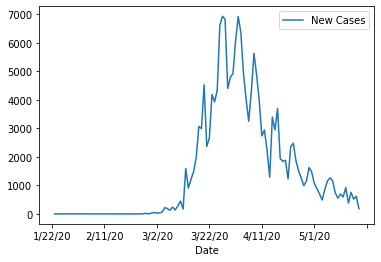

In [12]:
germany_confirmed.plot(y="New Cases")

Now: Create new column with calculated R_7 values

In [0]:
germany_confirmed["R_7"]=(germany_confirmed["Total Cases"]-germany_confirmed.shift(7)["Total Cases"])/(germany_confirmed.shift(4)["Total Cases"]-germany_confirmed.shift(11)["Total Cases"])

In [16]:
germany_confirmed.tail()

Germany,Total Cases,New Cases,R_7
Date,,,
5/14/20,174478,380.0,0.812228
5/15/20,175233,755.0,0.723070
5/16/20,175752,519.0,0.718365
5/17/20,176369,617.0,0.756402
5/18/20,176551,182.0,0.787441


Comment for the R_value-calculation: Especially for the beginning this throws unrealistically high values, because consecutive days where no new cases are detected, so if one new case is detected one day, it sometimes even returns infinitely high R-values. See plot for visualisation:

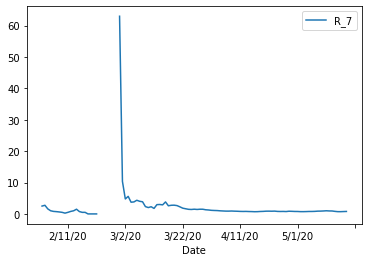

In [17]:
germany_confirmed.plot(y="R_7")

Let's try to plot the same only for values from mid-March onwards (note that the times when the R-values become realistic or even start becoming unrealistic again are different for different countries, something we have to keep in mind for our interactive maps):

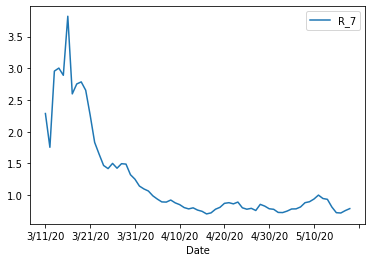

In [18]:
germany_confirmed["3/11/20":].plot(y="R_7")

This is the full code that I used to create the germany_confirmed dataframe:

In [0]:
germany_confirmed=data_confirmed.loc[:,["Germany"]]
germany_confirmed["Total Cases"]=germany_confirmed["Germany"]
germany_confirmed.drop("Germany",inplace=True, axis=1)
germany_confirmed.rename_axis(columns="Germany",inplace=True)

germany_confirmed["New Cases"]=germany_confirmed["Total Cases"]-germany_confirmed.shift(1)["Total Cases"]

germany_confirmed["R_7"]=(germany_confirmed["Total Cases"]-germany_confirmed.shift(7)["Total Cases"])/(germany_confirmed.shift(4)["Total Cases"]-germany_confirmed.shift(11)["Total Cases"])

Now create a function that can create the same dataframe for any country we want:

In [0]:
def create_country(country):
  country_confirmed=data_confirmed.loc[:,[country]]
  country_confirmed["Total Cases"]=country_confirmed[country]
  country_confirmed.drop(country, inplace=True, axis=1)
  country_confirmed.rename_axis(columns=country,inplace=True)
  country_confirmed["New Cases"]=country_confirmed["Total Cases"]-country_confirmed.shift(1)["Total Cases"]
  country_confirmed["R_7"]=(country_confirmed["Total Cases"]-country_confirmed.shift(7)["Total Cases"])/(country_confirmed.shift(4)["Total Cases"]-country_confirmed.shift(11)["Total Cases"])

  return(country_confirmed)

In [27]:
create_country("Argentina")

Argentina,Total Cases,New Cases,R_7
Date,,,
1/22/20,0,NaN,NaN
1/23/20,0,0.0,NaN
1/24/20,0,0.0,NaN
1/25/20,0,0.0,NaN
1/26/20,0,0.0,NaN
...,...,...,...
5/14/20,7134,255.0,1.409273
5/15/20,7479,345.0,1.342919
5/16/20,7805,326.0,1.314971


I now create a dictionary with all the dataframes for every country

In [0]:
country_dataframes = {country: create_country(country) for country in data_confirmed.columns}

In [46]:
country_dataframes['Germany']

Germany,Total Cases,New Cases,R_7
Date,,,
1/22/20,0,NaN,NaN
1/23/20,0,0.0,NaN
1/24/20,0,0.0,NaN
1/25/20,0,0.0,NaN
1/26/20,0,0.0,NaN
...,...,...,...
5/14/20,174478,380.0,0.812228
5/15/20,175233,755.0,0.723070
5/16/20,175752,519.0,0.718365
